# Exploratory Data Analysis

In [2]:
# Import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read CSV
df = pd.read_csv('cover_data.csv')
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [4]:
# Print shape
df.shape

(581012, 55)

The dataset has 54 feautures and 581012 samples. The last column is the label. This is enough data to train, validate and test an ANN with. 

In [5]:
# Print columns
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

* Elevation / quantitative /meters / Elevation in meters
* Aspect / quantitative / azimuth / Aspect in degrees azimuth
* Slope / quantitative / degrees / Slope in degrees
* Horizontal_Distance_To_Hydrology / quantitative / meters / Horz Dist to nearest surface water features
* Vertical_Distance_To_Hydrology / quantitative / meters / Vert Dist to nearest surface water features
* Horizontal_Distance_To_Roadways / quantitative / meters / Horz Dist to nearest roadway
* Hillshade_9am / quantitative / 0 to 255 index / Hillshade index at 9am, summer solstice
* Hillshade_Noon / quantitative / 0 to 255 index / Hillshade index at noon, summer solstice
* Hillshade_3pm / quantitative / 0 to 255 index / Hillshade index at 3pm, summer solstice
* Horizontal_Distance_To_Fire_Points / quantitative / meters / Horz Dist to nearest wildfire ignition points
* Wilderness_Area (4 binary columns) / qualitative / 0 (absence) or 1 (presence) / Wilderness area designation
* Soil_Type (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation
* Cover_Type (7 types) / integer / 1 to 7 / Forest Cover Type designation

Wildnerness_Area and Soil_Type is already one-hot encoded. The Cover_Type is the label for the corresponding sample. 

In [6]:
# Check for null values.
df.info()

# There are no null values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [7]:
# Print statistics summary
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: class, dtype: int64 
 2    0.487599
1    0.364605
3    0.061537
7    0.035300
6    0.029891
5    0.016339
4    0.004728
Name: class, dtype: float64


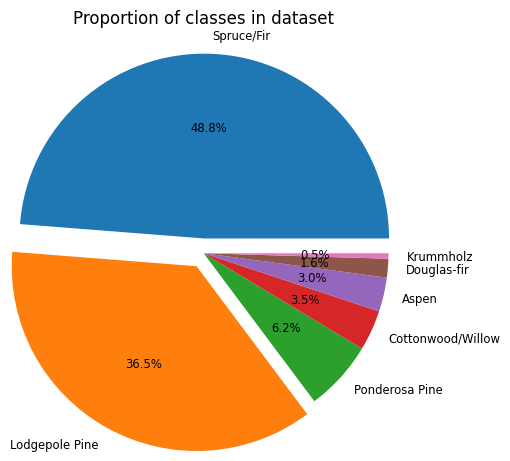

In [47]:
# Print unique classes
print(df['class'].value_counts(), "\n", df['class'].value_counts(normalize=True))

# Create labels for classes
labels =  ['Spruce/Fir','Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']

# Plot pie chart for number of classes
plt.pie(df['class'].value_counts(),
         labels=labels, 
         explode=(0.1, 0.1, 0, 0, 0, 0, 0), 
         autopct='%1.1f%%', 
         textprops={'size': 'smaller'},
         radius=1.25)
plt.title("Proportion of classes in dataset", y=1.1)
plt.show()

The proportion of classes is heavily imbalanced. The majority classes 1 and 2, make up 85.22 % of the dataset. This will form bias when creating the model and makes identifying the minority classes especially 4 , difficult. 

Metrics like F1, will need to be examined when evaluating the model to determine if the data needs to undergo further processing, such as random over and under sampling to fix the imbalances.

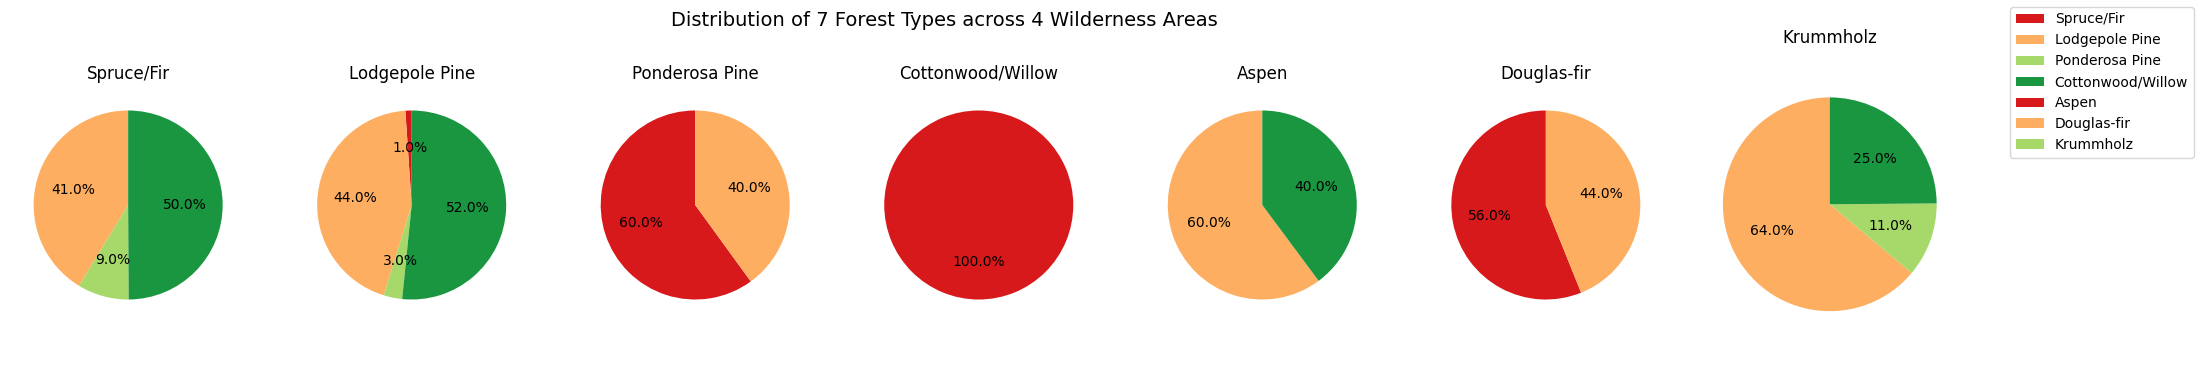

In [52]:
# Create a dictionary to reference the wilderness areas to their real names
wilderness_areas_dict = {'Wilderness_Area1':'Rawah',
                           'Wilderness_Area2':'Neota', 
                           'Wilderness_Area3': 'Comanche Peak', 
                           'Wilderness_Area4': 'Cache la Poudre'}

# Create new df with altered columns
df_altered = df.rename(columns= wilderness_areas_dict)

# Create a pivot table couting the number of each forest cover in each wilderness
areas = pd.pivot_table(df_altered,values = ['Rawah', 'Neota', 'Comanche Peak', 'Cache la Poudre'], index = 'class', aggfunc = np.sum)

# Create subplots of pie charts visualising the wilderness area distribution in each forest-cover
colors = ['#d7191c','#fdae61','#a6d96a','#1a9641']
f, ax = plt.subplots(1, 7, figsize=(25,4))
i = 0
for a in range(len(ax)):
  ax[a].pie(areas.iloc[a, :], autopct = lambda p: '{:.1f}%'.format(round(p)) if p>0 else '',startangle = 90, colors= colors) # labda for not showing 0 values
  ax[a].title.set_text(labels[a])
  plt.axis('equal')
f.legend(labels)
f.suptitle('Distribution of 7 Forest Types across 4 Wilderness Areas ', fontsize = 14)
plt.axis('equal')
plt.show() 

Spruce/Fir and Lodgepole Pine are majorly found in Rawah: Spurce/Fir is not present in Cache la Poudre and only 1 % of Lodgepole Pine isn't present in this area also for this dataset. This is likely due to the temperature conditions at the wilderness areas - Rawah is a colder enviroment commpared to Cache La Poudre and thus, favours Spruce growth.

 Ponerosa Pine, Willow and Douglas-fir are the only cover types to be found in Cache La Poudrel. Cache La Poudrel is likely to be warmer, have more sun and be drier, thus favouring these cover types.
 
 Aspen and Krummhalz are majorly found in Comanche Peak. This is likely due to the higher elevation ranges that favour these types.

 The wilderness areas can provide some reassurance when building the model to be accurate for the minority forest types as the likelyness of the minority classes existing in certain wilderness  provide enough distinction from the majority classes. For example, if a type belongs in the Cache la Poudre area, the likelyness of forest type being either of the majority classes, Aspen and Krummhalz is extremely low.

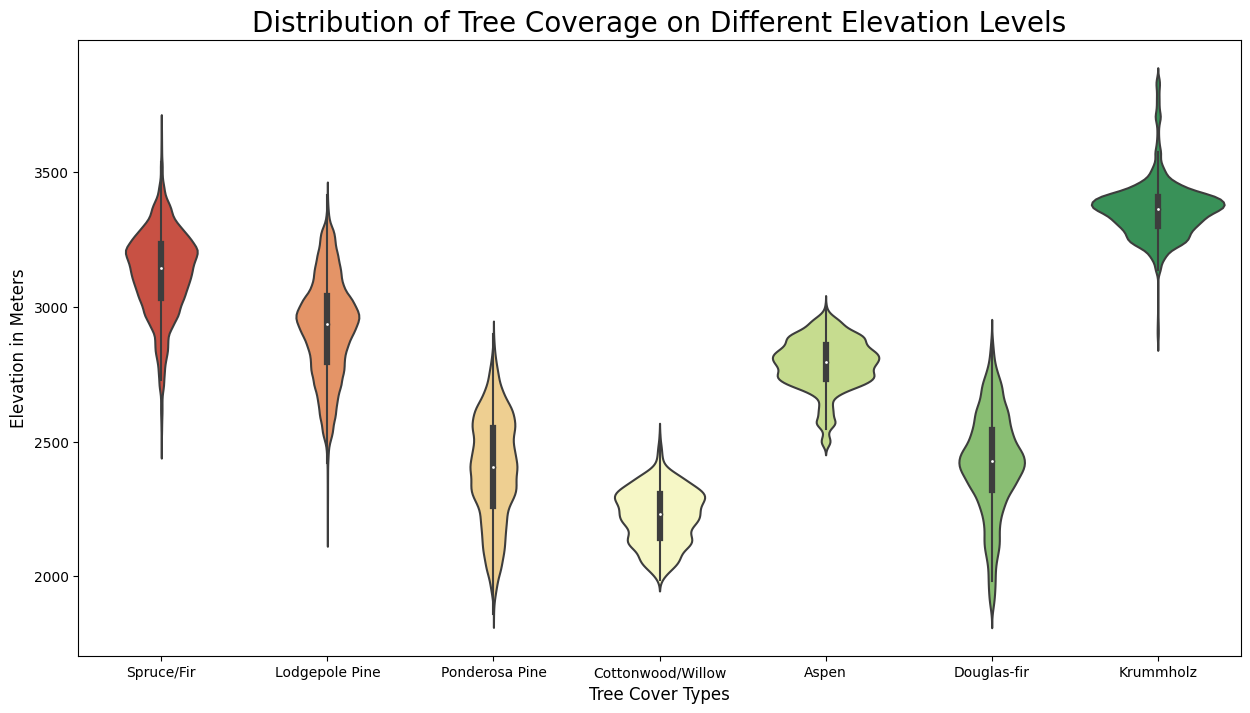

In [62]:
# Plot the distribution of elevation for each cover type
ax, fig = plt.subplots(figsize = (15,8))
sns.violinplot(data = df_altered, x = 'class', y = 'Elevation', palette ='RdYlGn')
fig.set_xticklabels(labels)
plt.title('Distribution of Tree Coverage on Different Elevation Levels', fontsize=20)
plt.ylabel('Elevation in Meters', fontsize=12)
plt.xlabel('Tree Cover Types', fontsize=12)
plt.show()

Spurce/Fir and Lodgepole grow at higher elevation levels compared to Ponderosa Pine, Willow and Douglas-fir. This was expected when looking at which wilderness area these cover types are marjorly found in. 

Krummholz together with Spruce and Lodgepole pine,  grows on highes mountains, having more than 3000m. Other species grow in areas below 3000m elevation. None of the species seems to be normaly distributed, but most close to normal distribution is Lodgepole Pine, although with quite some outliers. Least outliers are visible for Willow, it means that this type only can grow in areas not higher than 2500m.

When comparing the distrubtion across the types, it provides further reassurance that the model won't be biased to Spurce/Fir and Lodgepole Pine as there is enough distinction between the rest of the types, espcially Willow - the least sampled typed by far.

Several outliers exist for Spruce and Lodgepole Pine and it may be benifitial for the performance of the model to remove these outliers as these types make up the vast majority of the dataset. The same can be done for Krummholz despite it being one of the minority types.